<a href="https://colab.research.google.com/github/tako21ttp/tako21aiko/blob/main/Python%20Scripts/%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0%E3%81%AE%E5%AE%9F%E8%A3%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[機械学習の入り口「線形回帰」の実装を Python × NumPy で体験](https://zero2one.jp/learningblog/machine-learning-linear-regression/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

「30人の身長と体重のデータ」をNumPy配列で作成します。

In [2]:
# X：30個の入力データ（身長 [cm]）
X = np.array([131, 132, 132, 133.5, 135, 142, 143.8, 144, 148, 149, 150, 152, 153, 157, 158, 158, 162, 164, 166, 169, 169.5, 170, 172, 173, 173, 176, 180, 184, 186, 190])

# Y：Xに対応する正解データ（体重 [kg]）
Y = np.array([31, 28, 35, 40, 31, 40, 42, 45, 50, 48, 56, 50, 51, 56, 65, 61, 66, 61.5, 69, 71, 63, 68, 80, 74, 76.5, 82, 68, 75, 92, 90])

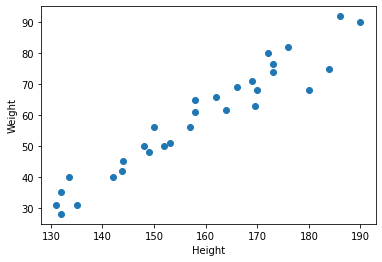

In [3]:
#グラフ表示
plt.scatter(X, Y) #散布図
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

実は、このデータのまま学習すると上手くいかない可能性があります。それはデータのスケール（値の範囲）が違うためです。先ほど用意したデータを見ると、
・身長：約130～190 cm
・体重：約30～90 kg
と桁が一つ違うことがわかります。このようにデータのスケールに偏りがあると上手く学習できないため、事前にスケールを揃えておくことが必要です。

データのスケールを揃える処理を一般に「正規化」といい、今回はその中でもよく使われる「標準化」を行います。

標準化の計算方法について、詳しくは[「データの前処理：正規化・標準化のプロセスをプログラムで体験」](https://zero2one.jp/learningblog/data-normalization-standardization/)で説明しているので、ここでは「データのスケールを揃えた方がいい」程度の理解でかまいません。

In [4]:
#標準化する関数を定義
def stand(x):
    M=x.mean()
    S=x.std()
    x=(x-M)/S
    return x

In [5]:
X=stand(X) #Xを標準化
Y=stand(Y) #yを標準化

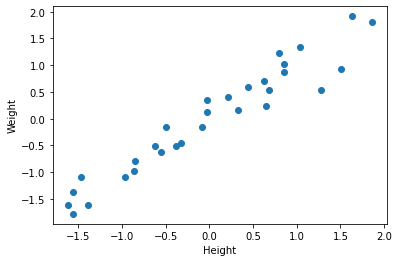

In [6]:
#グラフ表示
plt.scatter(X, Y) #散布図
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

データXとYの範囲がどちらもだいたい（-2～2）になったと思います。これでデータのスケールを揃えることができたので、いよいよ線形回帰に入っていきましょう。

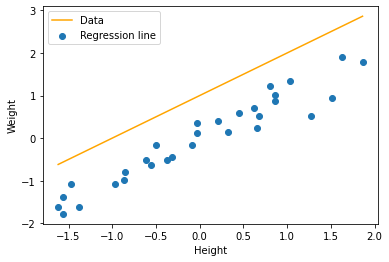

In [7]:
#初期値を1としてパラメータを設定
a=1
b=1

#仮説を定義
h=a*X+b

#データと仮説を重ねてプロットします。
plt.scatter(X, Y) #データをプロット
plt.plot(X, h, c='orange') #仮説をプロット
plt.legend((u'Data',u'Regression line')) #凡例
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()